In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'/Users/jackkelly/Desktop/MTSU/URECA Research/MIMIC-IV/2024 Data Sets/Version_1_Data_Set_WOut_Outliers.csv')

In [3]:
df.columns

Index(['subject_id', 'hadm_id', 'anchor_age', 'drg_severity', 'drg_mortality',
       'gender_M', 'race_ASIAN', 'race_ASIAN - ASIAN INDIAN',
       'race_ASIAN - CHINESE', 'race_ASIAN - KOREAN',
       'race_ASIAN - SOUTH EAST ASIAN', 'race_BLACK/AFRICAN',
       'race_BLACK/AFRICAN AMERICAN', 'race_BLACK/CAPE VERDEAN',
       'race_BLACK/CARIBBEAN ISLAND', 'race_HISPANIC OR LATINO',
       'race_HISPANIC/LATINO - CENTRAL AMERICAN',
       'race_HISPANIC/LATINO - COLUMBIAN', 'race_HISPANIC/LATINO - CUBAN',
       'race_HISPANIC/LATINO - DOMINICAN', 'race_HISPANIC/LATINO - GUATEMALAN',
       'race_HISPANIC/LATINO - HONDURAN', 'race_HISPANIC/LATINO - MEXICAN',
       'race_HISPANIC/LATINO - PUERTO RICAN',
       'race_HISPANIC/LATINO - SALVADORAN', 'race_MULTIPLE RACE/ETHNICITY',
       'race_NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER', 'race_OTHER',
       'race_PATIENT DECLINED TO ANSWER', 'race_PORTUGUESE',
       'race_SOUTH AMERICAN', 'race_UNABLE TO OBTAIN', 'race_UNKNOWN',
       

In [4]:
X = df.drop(columns=['length_of_stay', 'length_of_stay_hours', 'subject_id', 'hadm_id'])

In [5]:
y = df['length_of_stay_hours']

In [6]:
X

,anchor_age,drg_severity,drg_mortality,gender_M,race_ASIAN,race_ASIAN - ASIAN INDIAN,race_ASIAN - CHINESE,race_ASIAN - KOREAN,race_ASIAN - SOUTH EAST ASIAN,race_BLACK/AFRICAN,...,admission_location_TRANSFER FROM HOSPITAL,admission_location_TRANSFER FROM SKILLED NURSING FACILITY,admission_location_WALK-IN/SELF REFERRAL,admit-edout_categories_admit_as_leaving_ED,admit-edout_categories_observation,admit-edout_categories_spent_no_time_in_ED,admit-edout_categories_quartiles_q2,admit-edout_categories_quartiles_q3,admit-edout_categories_quartiles_q4,admit-edout_categories_quartiles_spent_no_time_in_ED
0,52,2.0,2.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
1,52,3.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,52,3.0,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,52,3.0,3.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,72,1.0,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287028,57,2.0,2.0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
287029,46,3.0,2.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
287030,58,4.0,4.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
287031,58,2.0,1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [7]:
y

0          18.866667
1          24.366667
2          42.100000
3          53.333333
4         108.933333
             ...    
287028    132.733333
287029    240.266667
287030    167.916667
287031     83.800000
287032    207.316667
Name: length_of_stay_hours, Length: 287033, dtype: float64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.ensemble import RandomForestRegressor

In [11]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1, max_depth=5, n_estimators=100, oob_score=True)

In [12]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, n_jobs=-1, oob_score=True, random_state=42)

In [13]:
rf.oob_score_

0.23562113732775503

In [14]:
rf.score(X_train,y_train)

0.2373053404037423

In [15]:
rf.score(X_test,y_test)

0.23779037654914514

In [16]:
#stats before hyperperameter tuning
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
y_pred = rf.predict(X_test)

# Compute R-squared score
r2 = r2_score(y_test, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared score: 0.23779037654914514
Mean Squared Error: 8403.499681138757
Mean Absolute Error: 63.55111274470489


In [17]:
#hyper paremeter tuning
from sklearn.model_selection import GridSearchCV

In [18]:
rf = RandomForestRegressor(random_state=42, n_jobs=-1)

In [19]:
# Define hyperparameters grid
# Define hyperparameters grid
param_grid = {
    'n_estimators': [400, 500, 600],          # Number of trees in the forest
    'max_depth': [5,10],          # Maximum depth of the trees
    #'min_samples_split': [2, 10, 25, 40],          # Minimum number of samples required to split an internal node
    #'min_samples_leaf': [1, 5, 15, 20],            # Minimum number of samples required to be at a leaf node
    #'max_features': ['auto', 'sqrt', 'log2']  # Number of features to consider when looking for the best split
}

In [20]:
# Perform Grid Search Cross-Validation
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END ......................max_depth=5, n_estimators=500; total time= 3.7min
[CV] END ......................max_depth=5, n_estimators=600; total time= 4.4min
[CV] END .....................max_depth=10, n_estimators=500; total time= 8.9min
[CV] END ......................max_depth=5, n_estimators=500; total time= 3.7min
[CV] END .....................max_depth=10, n_estimators=400; total time= 6.2min
[CV] END .....................max_depth=10, n_estimators=500; total time= 8.9min


GridSearchCV(cv=5, estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [5, 10], 'n_estimators': [400, 500, 600]},
             verbose=2)

In [21]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'max_depth': 10, 'n_estimators': 600}


In [22]:
# Use the best model for prediction
best_rf_regressor = grid_search.best_estimator_
y_pred = best_rf_regressor.predict(X_test)

In [23]:
#scoring after hyperparameter tuning
# Compute R-squared score
r2 = r2_score(y_test, y_pred)

# Compute mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Compute mean absolute error (MAE)
mae = mean_absolute_error(y_test, y_pred)

print("R-squared score:", r2)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)

R-squared score: 0.24851454242471382
Mean Squared Error: 8285.263802525988
Mean Absolute Error: 62.8312236998


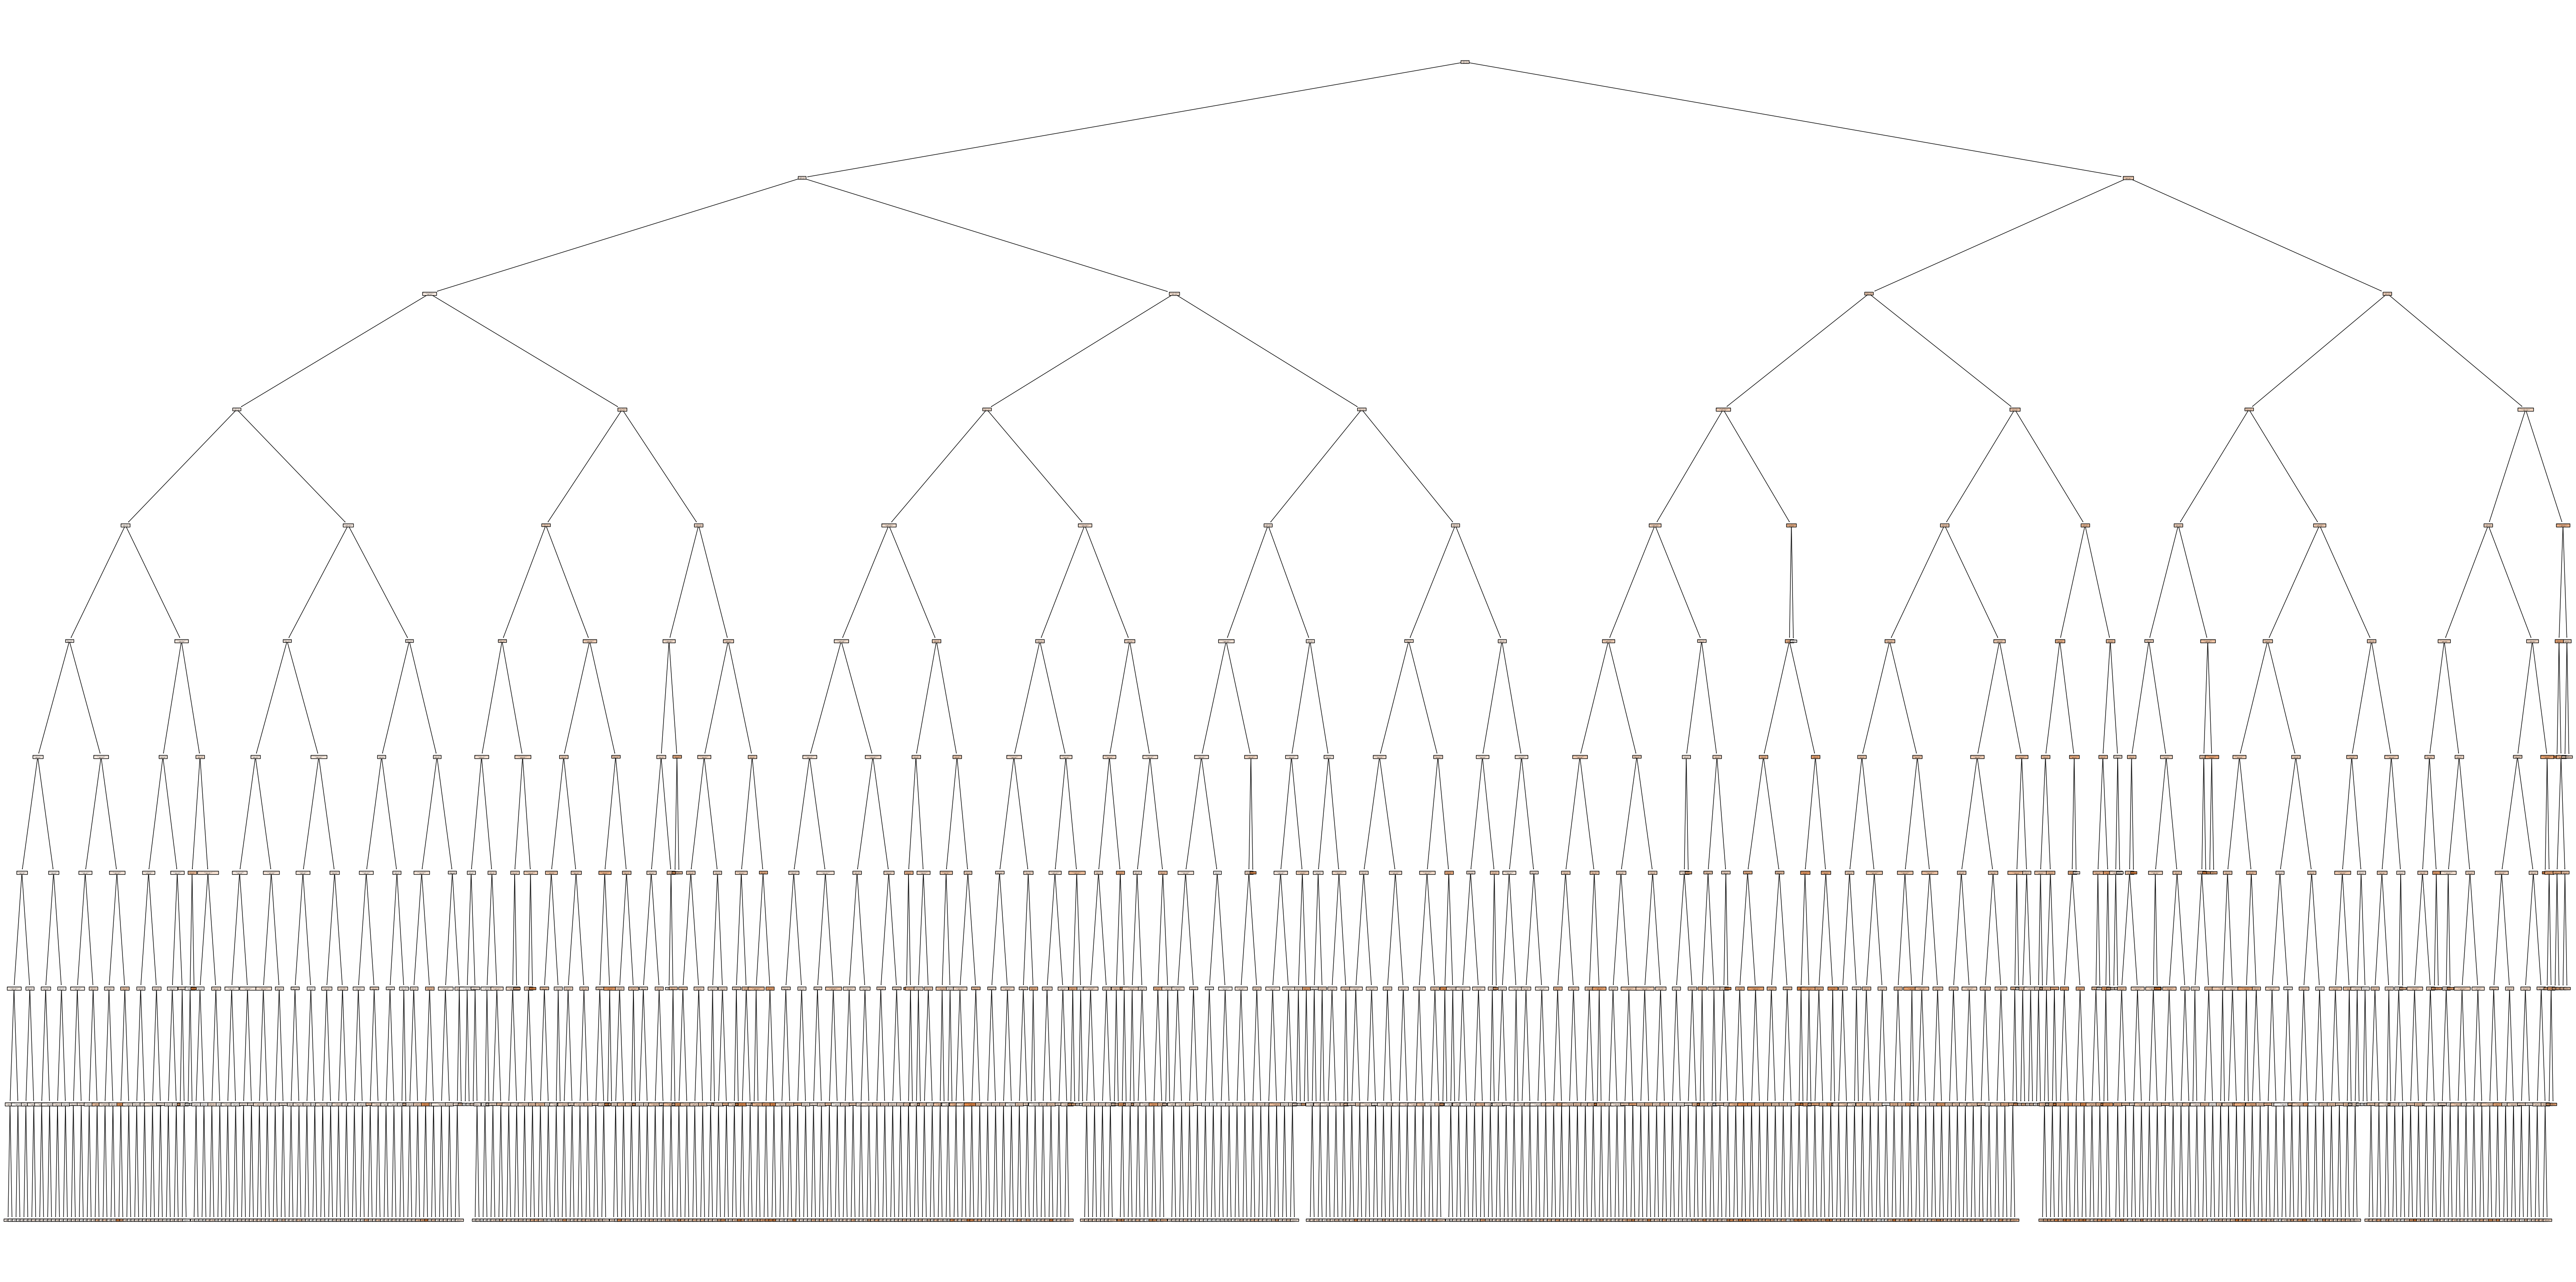

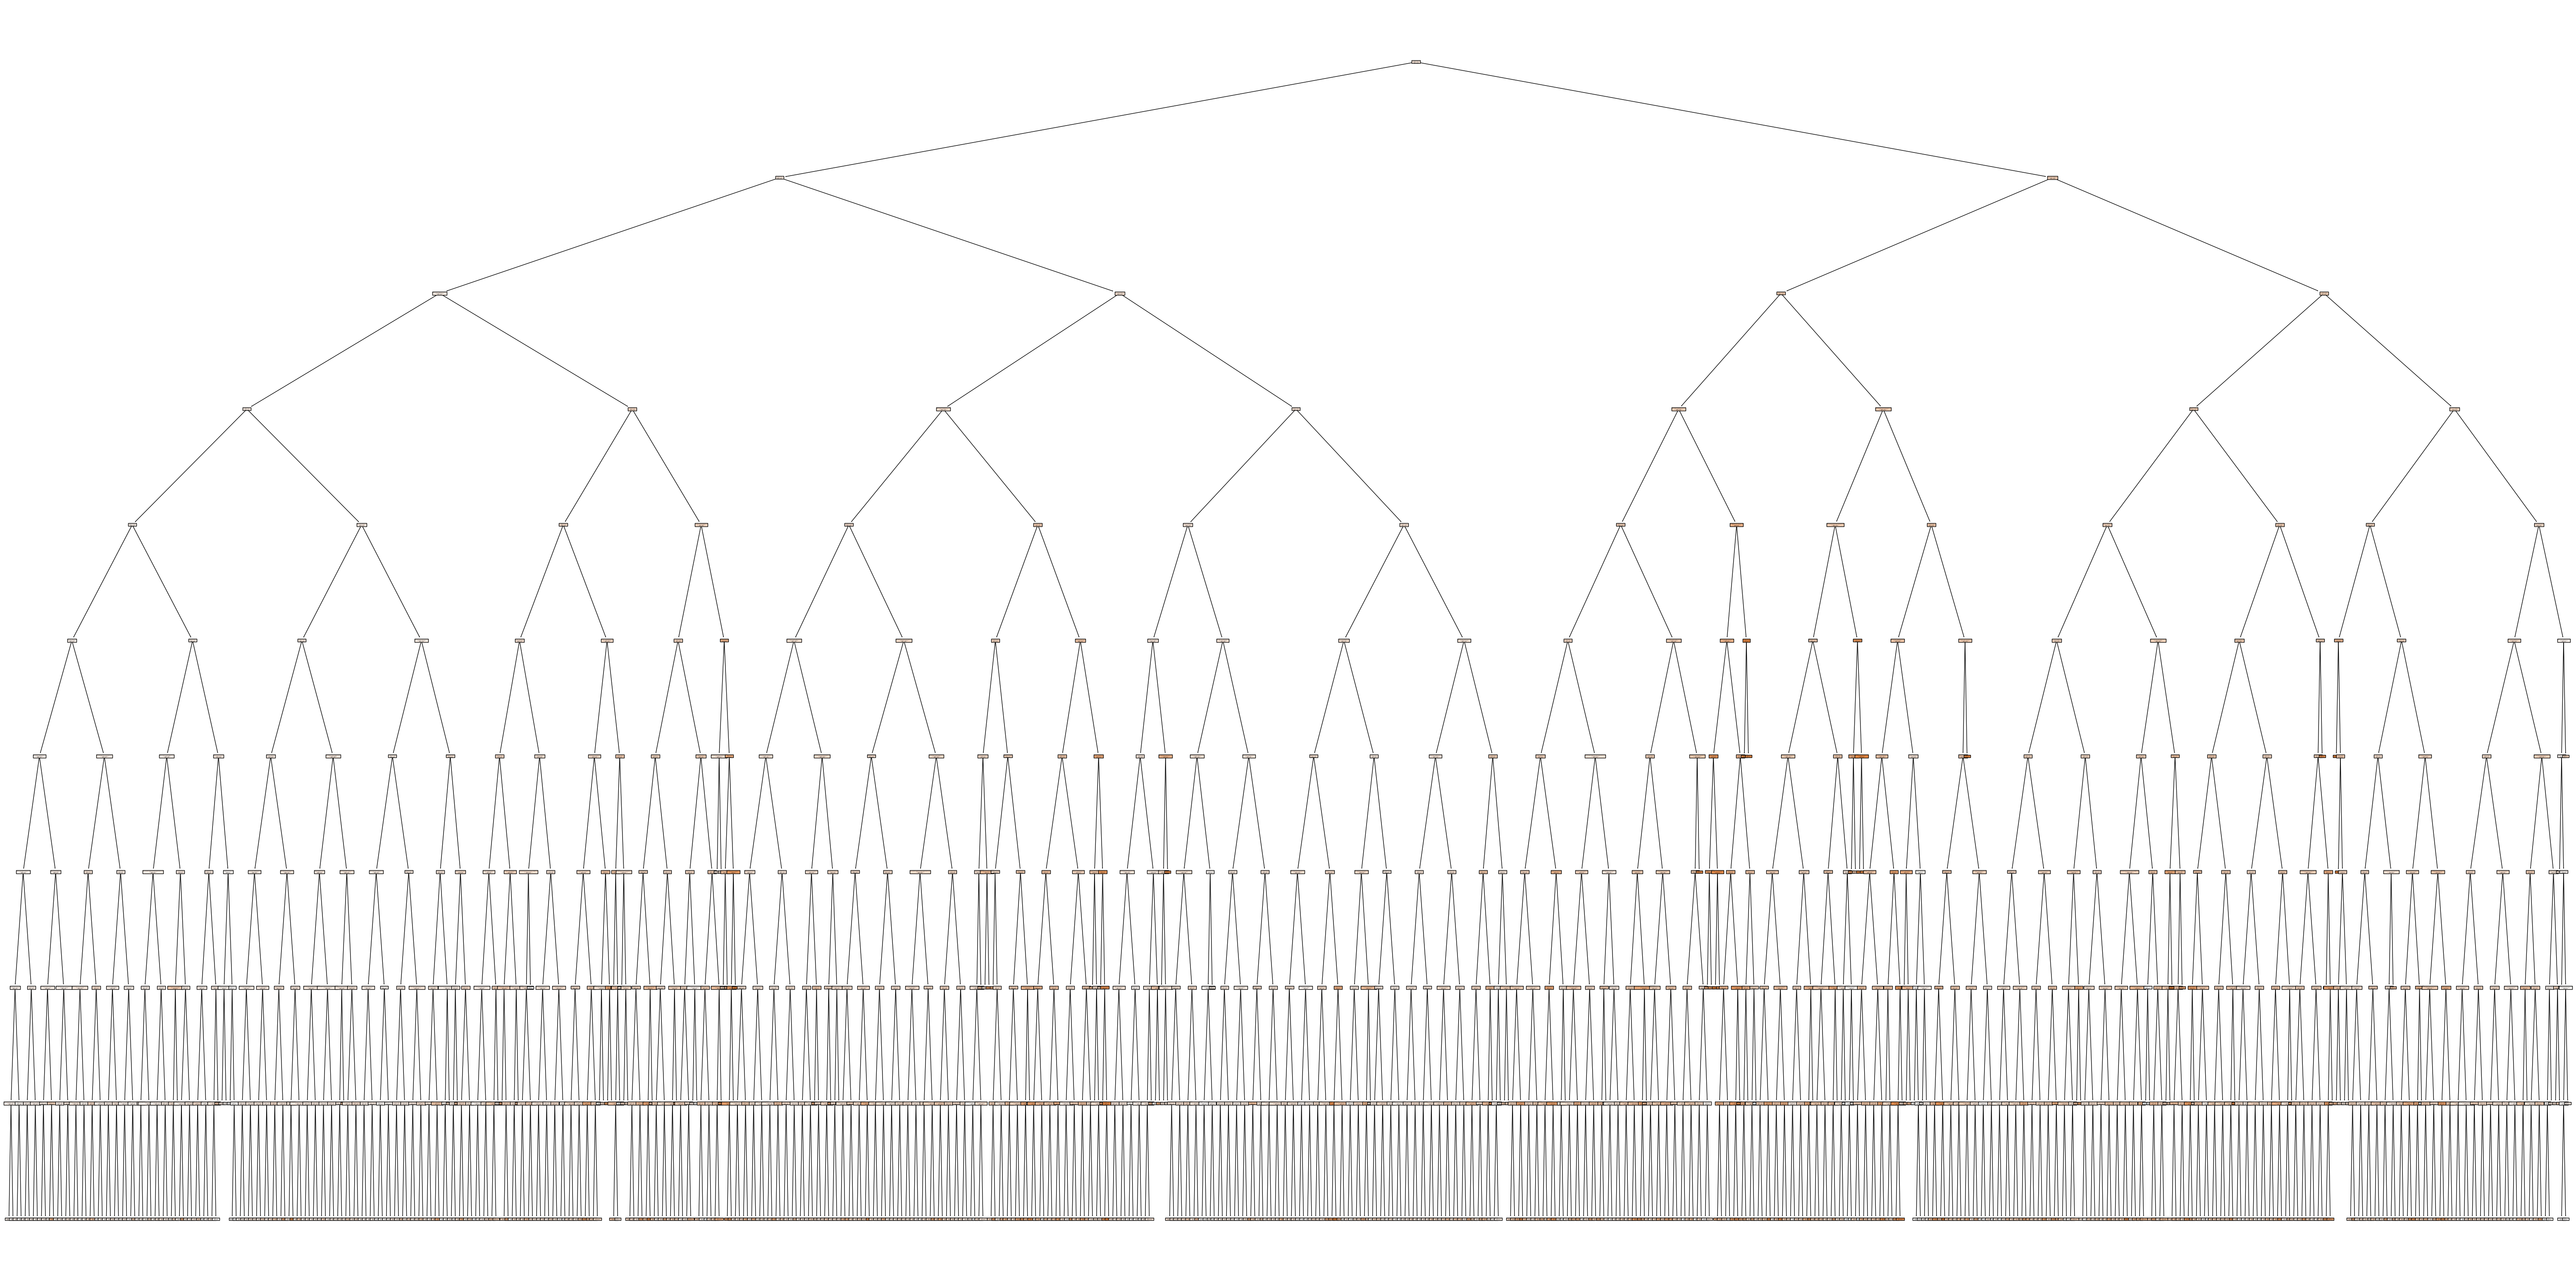

In [24]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
#Get a visualization of the first and second tree
# Display the first tree
plt.figure(figsize=(80, 40))
plot_tree(best_rf_regressor.estimators_[0], feature_names=df.columns, filled=True)
plt.show()

# Display the second tree
plt.figure(figsize=(80, 40))
plot_tree(best_rf_regressor.estimators_[1], feature_names=df.columns, filled=True)
plt.show()

In [25]:
#Now determine the feature importance
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": best_rf_regressor.feature_importances_
})

# Assuming imp_df is your DataFrame and "Imp" is the column you want to sort by
all_imp_df = imp_df.sort_values(by="Imp", ascending=False)

# Set display.max_rows option to None to show all rows
pd.set_option('display.max_rows', None)

all_imp_df

,Varname,Imp
1,drg_severity,0.739251
53,admission_location_INTERNAL TRANSFER TO OR FRO...,0.046302
0,anchor_age,0.045262
2,drg_mortality,0.025590
51,admission_location_EMERGENCY ROOM,0.023024
46,admission_type_EW EMER.,0.007715
57,admission_location_TRANSFER FROM HOSPITAL,0.007042
62,admit-edout_categories_spent_no_time_in_ED,0.006110
66,admit-edout_categories_quartiles_spent_no_time...,0.006014
30,race_UNKNOWN,0.005202
